In [1]:
from ldr import mnist_training, mnist_data, mnist_viz
import fifteen
import numpy as onp

In [2]:
experiment = fifteen.experiments.Experiment(identifier="mnist-ldr-2021-11-07-12:40:05")
config = experiment.read_metadata("train_config", mnist_training.TrainConfig)
train_state = mnist_training.TrainState.setup(
    config=config,
    seed=0,
)
train_state = experiment.restore_checkpoint(train_state)

[Experiment-mnist-ldr-2021-11-07-12:40:05] Reading metadata from experiments/mnist-ldr-2021-11-07-12:40:05/train_config.yaml


In [3]:
print(f"Training step count: {train_state.steps}")

Training step count: 2100


In [4]:
mnist_test = mnist_data.load_mnist_dataset("train")

  0%|          | 0/2 [00:00<?, ?it/s]

In [5]:
import jax
from jax import numpy as jnp

minibatch = jax.tree_map(lambda x: x[:16], mnist_test)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

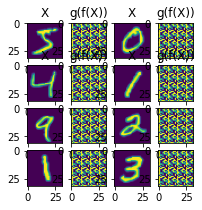

In [7]:
import matplotlib

matplotlib.use("Agg")

mnist_viz.visualize_encode_decode(
    train_state,
    minibatch,
)

In [6]:
@jax.jit
def f(X: jnp.ndarray) -> jnp.ndarray:
    return train_state.f_model.apply(train_state.f_state, X, train=False)


@jax.jit
def g(Z: jnp.ndarray) -> jnp.ndarray:
    return train_state.g_model.apply(train_state.g_state, Z, train=False)

In [7]:
print("hi")

hi


In [8]:
import matplotlib
import matplotlib.pyplot as plt

import PIL

import io

# matplotlib.use("Agg")


def gen_plot():
    """Create a pyplot plot and save to buffer."""
    plt.figure()
    plt.plot([1, 2])
    plt.title("test")
    buf = io.BytesIO()
    plt.savefig(buf, format="jpeg")
    buf.seek(0)
    return buf

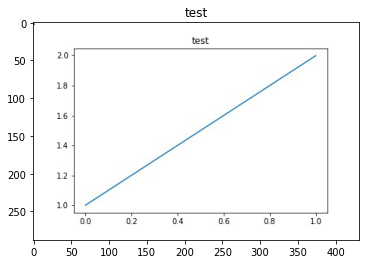

In [9]:
img = onp.array(PIL.Image.open(gen_plot()))
plt.imshow(img)
plt.show()

In [10]:
experiment.summary_writer.image

<bound method SummaryWriter.image of <flax.metrics.tensorboard.SummaryWriter object at 0x7ff680158e20>>

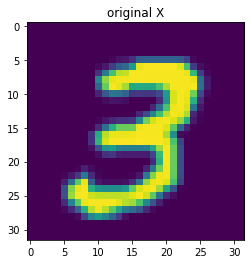

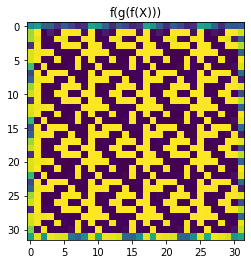

In [11]:
import matplotlib.pyplot as plt

X = minibatch.image
Z = f(minibatch.image)
X_hat = g(Z)
Z_hat = f(X_hat)

idx = 7
plt.imshow(X[idx].squeeze(axis=-1))
plt.title("original X")
plt.show()

plt.imshow(X_hat[idx].squeeze(axis=-1))
plt.title("f(g(f(X)))")
plt.show()

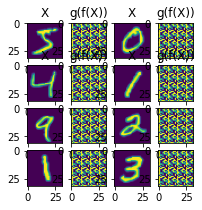

In [28]:
fig, axs = plt.subplots(4, 4, figsize=(3, 3))
axs = axs.flatten()
for i in range(16 // 2):
    axs[i * 2].imshow(X[i])
    axs[i * 2 + 1].imshow(X_hat[i])
    if i < 4:
        axs[i * 2].set_title("X")
        axs[i * 2 + 1].set_title("g(f(X))")

In [13]:
from ldr import mcr

In [14]:
mcr.coding_rate(Z, 0.5)

DeviceArray(27.938858, dtype=float32)

In [15]:
mcr.coding_rate(onp.random.randn(32, 128), 0.5)

DeviceArray(216.92719, dtype=float32)

In [16]:
print(onp.min(X_hat), onp.max(X_hat))

-0.9961172 0.99741864


In [17]:
print(onp.min(minibatch.image), onp.max(minibatch.image))

-1.0 1.0


In [18]:
Z.shape

(16, 128)

In [19]:
Z @ Z.T

DeviceArray([[1.        , 0.7137828 , 0.72519475, 0.76950216, 0.7023047 ,
              0.68847775, 0.79352665, 0.73899823, 0.7862992 , 0.8052949 ,
              0.77433485, 0.7546045 , 0.7692729 , 0.7325611 , 0.82199204,
              0.7726408 ],
             [0.7137828 , 1.        , 0.718153  , 0.7614923 , 0.7096907 ,
              0.6800306 , 0.76664793, 0.72159976, 0.75470614, 0.70968807,
              0.7250619 , 0.75289476, 0.69689167, 0.71856403, 0.7631944 ,
              0.7559842 ],
             [0.72519475, 0.718153  , 1.        , 0.7331785 , 0.7172228 ,
              0.7270168 , 0.76701003, 0.71781087, 0.76032716, 0.73295265,
              0.6548039 , 0.7285995 , 0.7180488 , 0.7491595 , 0.7897223 ,
              0.78519857],
             [0.76950216, 0.7614923 , 0.7331785 , 0.9999999 , 0.68534386,
              0.7385214 , 0.83037716, 0.8029869 , 0.84909785, 0.7574617 ,
              0.8265921 , 0.77317715, 0.7630226 , 0.7995359 , 0.8778368 ,
              0.8197006 ],
    